In [1]:
import qiskit as qs

In [2]:
quantum_circuit_1 = qs.QuantumCircuit()
q_register = qs.QuantumRegister(2, "q_register")
quantum_circuit_1.add_register(q_register)

In [3]:
quantum_circuit_1.h(q_register[0])
quantum_circuit_1.cx(q_register[0], q_register[1])

In [4]:
print(quantum_circuit_1.draw())

              ┌───┐     
q_register_0: ┤ H ├──■──
              └───┘┌─┴─┐
q_register_1: ─────┤ X ├
                   └───┘


In [5]:
statevector_simulator = qs.Aer.get_backend("statevector_simulator")
job_1 = qs.execute(quantum_circuit_1, statevector_simulator)
result_1 = job_1.result()

In [6]:
print("State Vector: ", result_1.get_statevector())

State Vector:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [8]:
# quantum_circuit_2 = qs.QuantumCircuit(q_register)
# quantum_circuit_2.initialize(result.get_statevector(), q_register)

In [7]:
c_register = qs.ClassicalRegister(2, "c_register")
quantum_circuit_1.add_register(c_register)

In [8]:
quantum_circuit_1.measure(q_register[0], c_register[0])
quantum_circuit_1.measure(q_register[1], c_register[1])
quantum_circuit_1.draw()

┌───┐     ┌─┐   
q_register_0: ┤ H ├──■──┤M├───
              └───┘┌─┴─┐└╥┘┌─┐
q_register_1: ─────┤ X ├─╫─┤M├
                   └───┘ ║ └╥┘
c_register: 2/═══════════╩══╩═
                         0  1

In [9]:
qasm_simulator = qs.Aer.get_backend("qasm_simulator")
job_2 = qs.execute(quantum_circuit_1, qasm_simulator, shots=8192)
result_2 = job_2.result()

In [10]:
print("Counts: ", result_2.get_counts())

Counts:  {'00': 4114, '11': 4078}


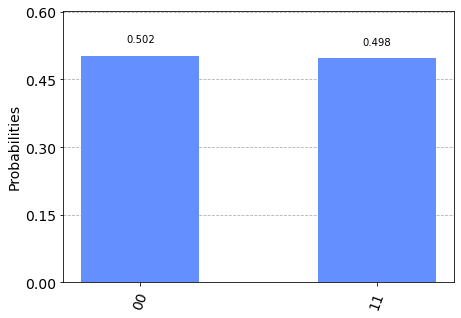

In [11]:
qs.visualization.plot_histogram(result_2.get_counts())

In [13]:
job_3 = qs.execute(quantum_circuit_1, qasm_simulator, shots=10, memory=True)
result_3 = job_3.result()
print("Observations: ", result_3.get_memory())

Observations:  ['00', '00', '00', '11', '00', '00', '11', '00', '11', '11']
